In [4]:
from PTL.data_process import load_data, augment_data,combine_augmented_data
from PTL.model import build_vae
from PTL.utils import set_random_seeds, limit_threads,save_to_excel, calculate_kl_divergences
from PTL.visualization import plot_kl_divergences_bar_chart
import numpy as np


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# 1. 设置随机种子和限制线程
set_random_seeds()  # 设置随机种子
limit_threads()  # 限制线程数

# 2. 加载数据
file_path = "data/raw/data_Pouch52.xlsx"
# file_path = ['data/data_Cylind21.xlsx', 'data/data_Pouch31.xlsx', 'data/data_Pouch52.xlsx']
data, Fts, SOC, SOE, SOH_values = load_data(
    file_path=file_path, sheet_name="All")


# 4. 构建VAE模型
vae, encoder, decoder = build_vae()

In [6]:
augmented_data, augmented_SOE_list, combined_data_normalized = augment_data(
    SOH_values, data, Fts, SOC, vae, encoder, decoder
)
# Combine all augmented data
all_augmented_data = np.vstack(augmented_data)
augmented_Fts = all_augmented_data[:, 1:]

Epoch 1/2
1/1 [==============================] - 0s 211ms/step - loss: 2.3485
Epoch 2/2
4/4 [==============================] - 0s 549us/step
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.2831
Epoch 2/2
4/4 [==============================] - 0s 581us/step
Epoch 1/2
1/1 [==============================] - 0s 3ms/step - loss: 2.1628
Epoch 2/2
4/4 [==============================] - 0s 689us/step
Epoch 1/2
1/1 [==============================] - 0s 6ms/step - loss: 2.2453
Epoch 2/2
4/4 [==============================] - 0s 535us/step
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.1151
Epoch 2/2
4/4 [==============================] - 0s 538us/step
Epoch 1/2
1/1 [==============================] - 0s 3ms/step - loss: 2.1773
Epoch 2/2
4/4 [==============================] - 0s 553us/step
Epoch 1/2
1/1 [==============================] - 0s 7ms/step - loss: 2.1987
Epoch 2/2
4/4 [==============================] - 0s 579us/step
Epoch 1/2
1/1 [==========

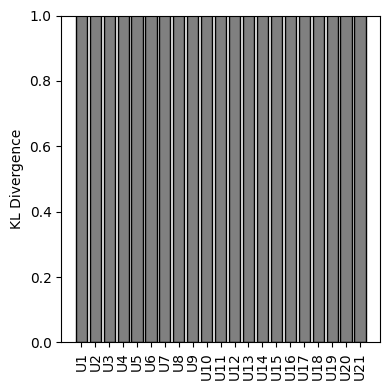

KL Divergence for U1: 12.9768
KL Divergence for U2: 10.2903
KL Divergence for U3: 9.0802
KL Divergence for U4: 9.2445
KL Divergence for U5: 8.9717
KL Divergence for U6: 11.1833
KL Divergence for U7: 11.7282
KL Divergence for U8: 12.0364
KL Divergence for U9: 13.0338
KL Divergence for U10: 11.9966
KL Divergence for U11: 7.7146
KL Divergence for U12: 10.1341
KL Divergence for U13: 8.4336
KL Divergence for U14: 14.0208
KL Divergence for U15: 10.5055
KL Divergence for U16: 10.4537
KL Divergence for U17: 10.6824
KL Divergence for U18: 11.1180
KL Divergence for U19: 10.0718
KL Divergence for U20: 12.2746
KL Divergence for U21: 10.5123


In [7]:
# Calculate KL divergences for all features (U1 to U21)
kl_divergences = calculate_kl_divergences(Fts, augmented_Fts)
plot_kl_divergences_bar_chart(kl_divergences, Fts)